# Graph of Ag speciation

total silver 0.01 M and vary chloride from 10^-9 to 10^-2 M.  Plot all species.  including chloro complexes.

In [1]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-19);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.

error: graphics_toolkit: notebook toolkit is not available
error: called from
    graphics_toolkit at line 84 column 5


In [2]:
%establish the equlibrium problem

AgT=0.01; pH=7; pe=20.75-pH; logClT=-9:0.02:-1; ClT=10.^logClT;

In [3]:
% MODEL USING PHREEQC

for i=1:length(ClT)

minerals=[{'AgCls'}]; totalvector=[AgT; ClT(i); ClT(i)]; totalnames=[{'Ag'}; {'Cl'}; {'Na'}]; 
speciesexport=[{'Ag+'}; {'Cl-'}; {'AgCl'}; {'AgCl2-'}; {'AgCl3-2'}; {'AgCl4-3'}];
%database=['llnl_nosolubleAgCl.dat']; 
acid=['NaOH']; show=1; T=25;
%database=['AgCl.dat']; 
database=['AgClwithcomplexes.dat']; 

tic
[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=runPHREEQCv2noHA(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);
PHREEQCtime=toc;

Ag(i)=solutionspeciesconcs(1); 
Cl(i)=solutionspeciesconcs(2); 
AgCl(i)=solutionspeciesconcs(3); 
AgCl2(i)=solutionspeciesconcs(4); 
AgCl3(i)=solutionspeciesconcs(5); 
AgCl4(i)=solutionspeciesconcs(6); 
AgCls(i)=solidconcs(1);

end


Input file: runphreeqc.txt

Output file: out.txt

Database file: AgClwithcomplexes.dat


Initializing...                                                                 

End of Run after 0.003616 Seconds.
Input file: runphreeqc.txt

Output file: out.txt

Database file: AgClwithcomplexes.dat


Initializing...                                                                 

End of Run after 0.003427 Seconds.
Input file: runphreeqc.txt

Output file: out.txt

Database file: AgClwithcomplexes.dat


Initializing...                                                                 

End of Run after 0.00323 Seconds.
Input file: runphreeqc.txt

Output file: out.txt

Database file: AgClwithcomplexes.dat


Initializing...                                                                 

End of Run after 0.003275 Seconds.
Input file: runphreeqc.txt

Output file: out.txt

Database file: AgClwithcomplexes.dat


Initializing...                                                                 

End of

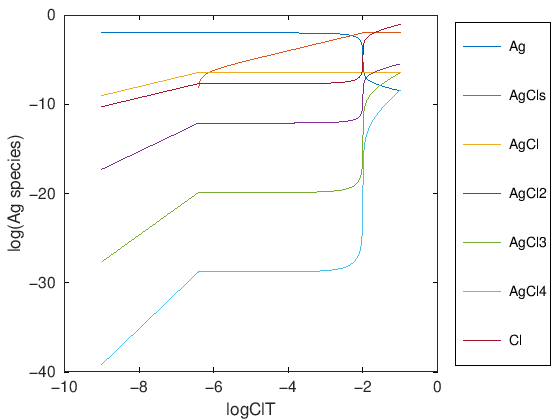

In [4]:
% graph the results

h=plot(logClT,log10(Ag),logClT,log10(AgCls),logClT,log10(AgCl),logClT,log10(AgCl2),logClT,log10(AgCl3),logClT,log10(AgCl4),logClT,log10(Cl));
set(h,'linewidth',2)
set(gca,'linewidth',2,'fontsize',12)
xlabel('logClT'); ylabel('log(Ag species)')
legend('Ag','AgCls','AgCl','AgCl2','AgCl3','AgCl4','Cl','location','eastoutside')